In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [44]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [45]:
x_train.shape

(60000, 28, 28)

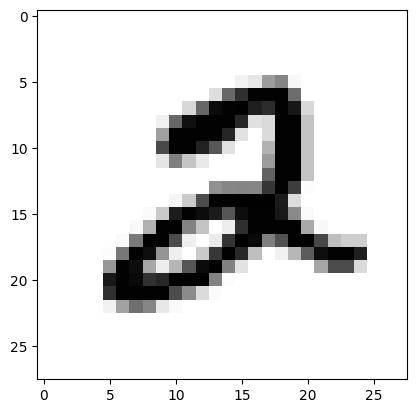

In [46]:
plt.imshow(x_train[5])
plt.show
plt.imshow(x_train[5],cmap=plt.cm.binary)

In [47]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Normalize


In [48]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [49]:
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [50]:
from keras.models import Sequential
from keras.layers  import (
    Activation,
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
)

model = Sequential()

# 1st conv layer 0,1,2,3,4 (60000,28,28,1) 28-3+1= 26*26
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.7565 - loss: 0.7415 - val_accuracy: 0.9503 - val_loss: 0.1594
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.9640 - loss: 0.1178 - val_accuracy: 0.9718 - val_loss: 0.0883
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.9754 - loss: 0.0817 - val_accuracy: 0.9632 - val_loss: 0.1278
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9805 - loss: 0.0645 - val_accuracy: 0.9778 - val_loss: 0.0708
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.9842 - loss: 0.0480 - val_accuracy: 0.9802 - val_loss: 0.0652


In [52]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9767 - loss: 0.0777
Test Loss on 10,000: 0.06260335445404053
Test Accuracy: 0.982200026512146


In [53]:
prediction=model.predict(x_testr)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[7.1284980e-08, 7.6939563e-05, 6.7613928e-06, ..., 9.9991322e-01,
        4.0791100e-08, 1.9944771e-06],
       [3.6939026e-03, 1.2258635e-05, 9.9600214e-01, ..., 1.2705550e-06,
        1.0618080e-04, 2.0886879e-05],
       [3.5450478e-06, 9.9998879e-01, 2.0472969e-06, ..., 2.2148984e-07,
        1.0522016e-07, 4.7634863e-08],
       ...,
       [1.5501875e-08, 1.7173974e-08, 2.0133221e-07, ..., 1.6264377e-07,
        2.3977627e-06, 2.3145392e-05],
       [8.4542218e-05, 1.7560708e-06, 6.2666732e-07, ..., 7.6591971e-07,
        3.2162460e-04, 6.3721209e-06],
       [9.3644245e-05, 8.4156079e-07, 5.7597816e-07, ..., 1.9390768e-10,
        9.9380550e-06, 5.4372623e-07]], dtype=float32)

In [54]:
print(np.argmax(prediction[77]))

2


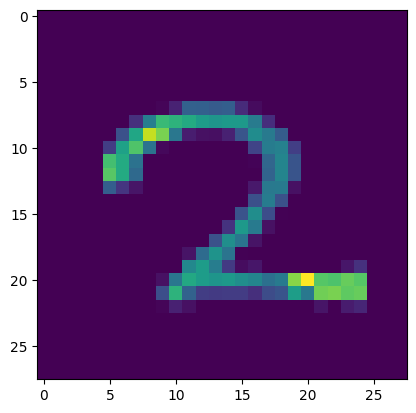

In [55]:
plt.imshow(x_testr[77])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
0


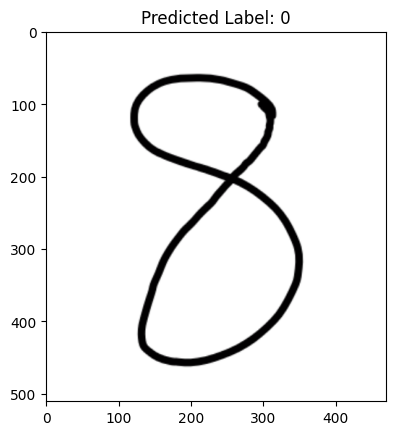

In [56]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the image
two = cv2.imread("8.png")
two_gray = cv2.cvtColor(two, cv2.COLOR_BGR2GRAY)

# Preprocess the image
resize = cv2.resize(two_gray, (28, 28), interpolation=cv2.INTER_AREA)
two_scaling = tf.keras.utils.normalize(resize, axis=1)
two_cov = np.array(two_scaling).reshape(-1, 28, 28, 1)

# Predict the number
pre = model.predict(two_cov)
pre_label = np.argmax(pre)
print(pre_label)

# Display the result
plt.imshow(two)
plt.title(f"Predicted Label: {pre_label}")
plt.show()